<a href="https://colab.research.google.com/github/a3539a/Colab/blob/main/3_5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_CNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
"""
날짜 : 2021/07/13
이름 : 김승용
내용 : 텐서플로 CNN 실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__

'2.5.0'

In [17]:
# 데이터 로드
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

In [18]:
# 데이터 확인
print(cifar_train_data.shape)
print(cifar_test_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


[ 2055 16588 11172 32060 15067 34971 39453 37663   833]


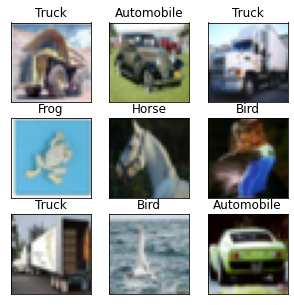

In [19]:
# 데이터 샘플 이미지 확인
label_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])

In [20]:
# 모델 학습을 위한 데이터 전처리(정규화)
cifar_train_data = cifar_train_data / 255
cifar_test_data  = cifar_test_data / 255

# 데이터의 라벨을 범주형(one-hot encoding) 으로 변환
cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label  = to_categorical(cifar_test_label)

In [25]:
# 학습모델 구성
model = Sequential()

# CNN층
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법


# FCNN층
model.add(Flatten()) # 입력층
model.add(Dense(256, activation='relu'))   # 은닉층
model.add(Dense(10, activation='softmax')) # 출력층

# 모델확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [26]:
# 학습모델 설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [27]:
model.fit(cifar_train_data, cifar_train_label, epochs=30, batch_size=128)

Epoch 1/30
391/391 [==============================] - 6s 13ms/step - loss: 1.6607 - acc: 0.3806
Epoch 2/30
391/391 [==============================] - 5s 13ms/step - loss: 1.1527 - acc: 0.5874
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.9421 - acc: 0.6638
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 0.8134 - acc: 0.7131
Epoch 5/30
391/391 [==============================] - 5s 13ms/step - loss: 0.7152 - acc: 0.7486
Epoch 6/30
391/391 [==============================] - 5s 13ms/step - loss: 0.6396 - acc: 0.7743
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.5823 - acc: 0.7953
Epoch 8/30
391/391 [==============================] - 5s 13ms/step - loss: 0.5315 - acc: 0.8122
Epoch 9/30
391/391 [==============================] - 5s 13ms/step - loss: 0.4897 - acc: 0.8272
Epoch 10/30
391/391 [==============================] - 5s 13ms/step - loss: 0.4502 - acc: 0.8403
Epoch 11/30
391/391 [==================

In [28]:
# 평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.8196 - acc: 0.8022


[0.8196077346801758, 0.8022000193595886]